## Description:

This dataset contains information on the signs and symptoms of newly diagnosed diabetic patients or those at risk of developing diabetes. The data was collected through direct questionnaires administered to patients at the Sylhet Diabetes Hospital in Sylhet, Bangladesh, and approved by a doctor.

## Purpose:

To predict the likelihood of diabetes at an early stage using data mining techniques.

## Variables Table:

- `age (Feature, Integer):` Age of the patient
- `gender (Feature, Categorical):` Gender of the patient
- `polyuria (Feature, Binary):` Presence of polyuria (Yes/No)
- `polydipsia (Feature, Binary):` Presence of polydipsia (Yes/No)
- `sudden_weight_loss (Feature, Binary):` Experience of sudden weight loss (Yes/No)
- `weakness (Feature, Binary):` Experience of weakness (Yes/No)
- `polyphagia (Feature, Binary):` Presence of polyphagia (Yes/No)
- `genital_thrush (Feature, Binary):` Presence of genital thrush (Yes/No)
- `visual_blurring (Feature, Binary):` Experience of visual blurring (Yes/No)
- `itching (Feature, Binary):` Experience of itching (Yes/No)


## Import Statements


In [12]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("notebook")
import plotly.express as px

# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    r2_score,
    jaccard_score,
)

# Other
from itertools import product
from sklearn.tree import export_graphviz

In [20]:
def plot_confusion_matrix(cm, classes, title, cmap, normalize=False):
    """
    This function is used to plot the confusion matrix for the Classification models
    """

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("UnNormalize Confusion Matrix")
    print(cm)

    plt.title(title)
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    threshold = cm.max() / 2.0
    labels = [["TP", "TN"], ["FP", "FN"]]

    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            f"{format(cm[i,j],fmt)}\n{labels[i][j]}",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
        )

    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

## Read Data


In [21]:
df = pd.read_csv("diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [22]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

### Label Encoding


In [24]:
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Exploratory Data Analysis


<Axes: >

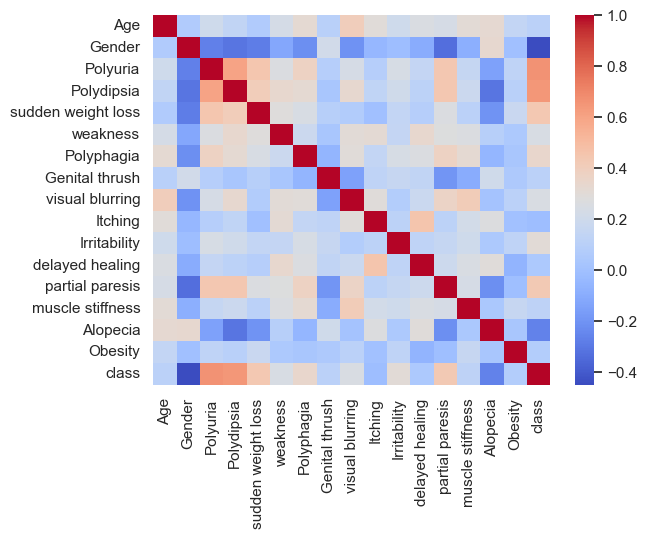

In [25]:
# Heatmap
sns.heatmap(data=df.corr(), cmap="coolwarm")

In [26]:
def high_correlation_columns(threshold):
    """This function would return the high correlation colums for the dataset"""
    high_cor_cols = []
    for cols in df.columns:
        if cols != "class" and df[cols].corr(df["class"]) > threshold:
            high_cor_cols.append(cols)

    return high_cor_cols

### Logistic Regression


In [27]:
X = df[high_correlation_columns(threshold=0.2)]
y = df["class"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

X_train  (416, 8)
X_test  (104, 8)
y_train  (416,)
y_test  (104,)


In [29]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_predict = log.predict(X_test)

log_accuracy_score = accuracy_score(y_predict, y_test)
log_jaccard_score = jaccard_score(y_predict, y_test)
log_r2_score = r2_score(y_predict, y_test)

index = ["Accuracy Score", "Jaccard Score", "r2 Score"]

report = {"Scores": [log_accuracy_score, log_jaccard_score, log_r2_score]}

Report = pd.DataFrame(report, index=index)

Report

,Scores
Accuracy Score,0.846154
Jaccard Score,0.757576
r2 Score,0.382560


UnNormalize Confusion Matrix
[[50  5]
 [11 38]]


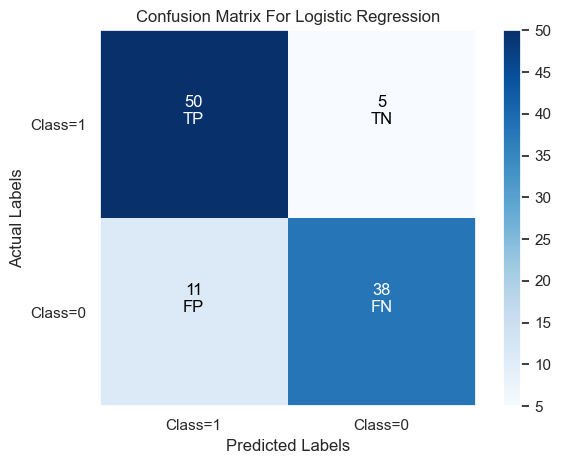

In [31]:
plot_confusion_matrix(
    cm=confusion_matrix(y_predict, y_test, labels=[1, 0]),
    classes=["Class=1", "Class=0"],
    title="Confusion Matrix For Logistic Regression",
    cmap=plt.cm.Blues,
)

In [32]:
param_grid = [
    {
        "penalty": ["l2"],
        "solver": ["newton-cg", "lbfgs", "sag"],
        "C": [0.01, 0.1, 1, 10, 100, 1000],
    }
]
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']}])

In [34]:
print(grid_search.best_estimator_)

LogisticRegression(C=1, solver='newton-cg')


In [33]:
grid_predict = grid_search.predict(X_test)

log_accuracy_score = accuracy_score(grid_predict, y_test)
log_jaccard_score = jaccard_score(grid_predict, y_test)
log_r2_score = r2_score(grid_predict, y_test)

index = ["Accuracy Score", "Jaccard Score", "r2 Score"]

report = {"Scores": [log_accuracy_score, log_jaccard_score, log_r2_score]}

Report = pd.DataFrame(report, index=index)

Report

,Scores
Accuracy Score,0.846154
Jaccard Score,0.757576
r2 Score,0.382560


UnNormalize Confusion Matrix
[[50  5]
 [11 38]]


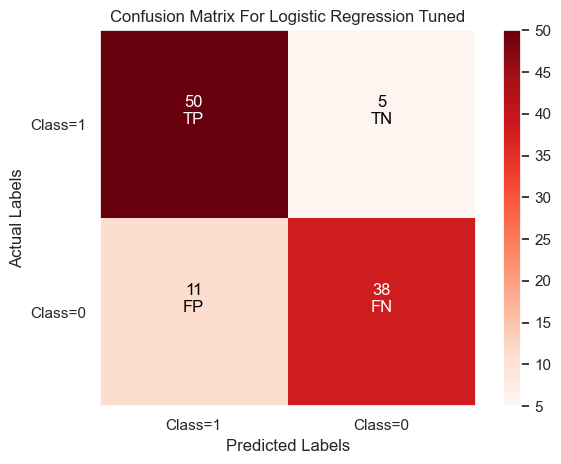

In [36]:
plot_confusion_matrix(
    cm=confusion_matrix(grid_predict, y_test, labels=[1, 0]),
    classes=["Class=1", "Class=0"],
    title="Confusion Matrix For Logistic Regression Tuned",
    cmap=plt.cm.Reds,
)

## Decision Trees


In [38]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
tree_predict = tree.predict(X_test)

tree_accuracy_score = accuracy_score(tree_predict, y_test)
tree_jaccard_score = jaccard_score(tree_predict, y_test)
tree_r2_score = r2_score(tree_predict, y_test)

index = ["Accuracy Score", "Jaccard Score", "r2 Score"]

report = {"Scores": [tree_accuracy_score, tree_jaccard_score, tree_r2_score]}

Report = pd.DataFrame(report, index=index)

Report

,Scores
Accuracy Score,0.923077
Jaccard Score,0.870968
r2 Score,0.691280


UnNormalize Confusion Matrix
[[54  1]
 [ 7 42]]


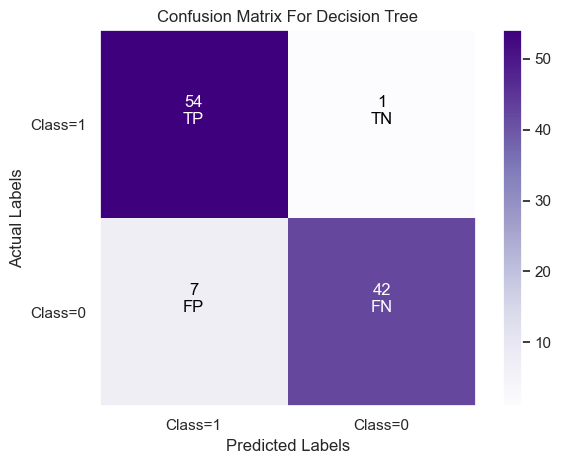

In [43]:
plot_confusion_matrix(
    cm=confusion_matrix(tree_predict, y_test, labels=[1, 0]),
    classes=["Class=1", "Class=0"],
    title="Confusion Matrix For Decision Tree",
    cmap=plt.cm.Purples,
)

### Model Tuning


In [53]:
param_grid = [
    {
        "criterion": ["gini", "entropy"],
        "splitter": ["random", "best"],
    }
]

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(), param_grid=param_grid, n_jobs=-1, cv=5
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'splitter': ['random', 'best']}])

In [54]:
print("Best Estimators: ", grid_search.best_estimator_)

Best Estimators:  DecisionTreeClassifier(criterion='entropy', splitter='random')


In [55]:
grid_predict = grid_search.predict(X_test)

tree_accuracy_score = accuracy_score(grid_predict, y_test)
tree_jaccard_score = jaccard_score(grid_predict, y_test)
tree_r2_score = r2_score(grid_predict, y_test)

index = ["Accuracy Score", "Jaccard Score", "r2 Score"]
report = {"Scores": [tree_accuracy_score, tree_jaccard_score, tree_r2_score]}
Report = pd.DataFrame(report, index=index)

Report

,Scores
Accuracy Score,0.923077
Jaccard Score,0.870968
r2 Score,0.691280


UnNormalize Confusion Matrix
[[54  1]
 [ 7 42]]


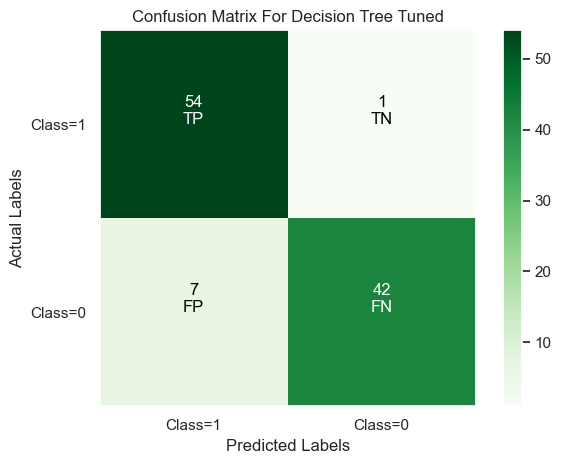

In [57]:
plot_confusion_matrix(
    cm=confusion_matrix(grid_predict, y_test, labels=[1, 0]),
    classes=["Class=1", "Class=0"],
    title="Confusion Matrix For Decision Tree Tuned",
    cmap=plt.cm.Greens,
)